In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('training.csv')

In [93]:
y = df['rate_of_penetration']
X = df.drop(['segment_id','rate_of_penetration','max_depth'],axis=1)

In [86]:
X.head()

,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0,area_0,formation_62,bit_model_1,12.25,21834.5,43.533280,150.369091
1,wellbore_chev_no_0,area_0,formation_61,bit_model_1,12.25,21840.0,42.382033,150.369001
2,wellbore_chev_no_0,area_0,formation_59,bit_model_1,12.25,21870.0,48.675129,150.429335
3,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21900.0,30.041290,150.080000
4,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21930.0,31.406319,150.032167


In [87]:
X.shape

(6784, 8)

In [ ]:
X.index = range(X.shape[0])

In [88]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X.iloc[:,5:]))
X = pd.concat([X.iloc[:,:5], X_std], axis=1)
X = pd.get_dummies(X)

In [102]:
X

,drillbit_size,0,1,2,wellbore_chev_no_id_wellbore_chev_no_0,wellbore_chev_no_id_wellbore_chev_no_1,wellbore_chev_no_id_wellbore_chev_no_10,wellbore_chev_no_id_wellbore_chev_no_11,wellbore_chev_no_id_wellbore_chev_no_12,wellbore_chev_no_id_wellbore_chev_no_13,...,bit_model_id_bit_model_34,bit_model_id_bit_model_36,bit_model_id_bit_model_37,bit_model_id_bit_model_39,bit_model_id_bit_model_4,bit_model_id_bit_model_40,bit_model_id_bit_model_42,bit_model_id_bit_model_43,bit_model_id_bit_model_6,bit_model_id_bit_model_8
0,12.25,0.382685,0.596266,-0.230151,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.25,0.383641,0.509338,-0.230155,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.25,0.388856,0.984517,-0.227755,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.25,0.394071,-0.422488,-0.241652,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.25,0.399287,-0.319417,-0.243555,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,12.25,0.899950,-1.122536,0.046745,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6780,12.25,0.905165,-1.510311,-0.434669,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6781,12.25,0.910380,-1.531288,-0.263724,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6782,12.25,0.915596,-1.409455,-0.264862,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Reduce Dimentions

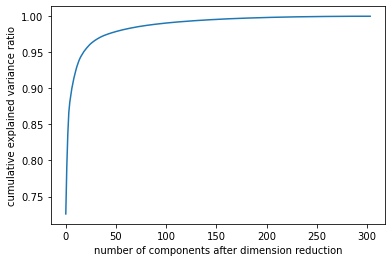

In [103]:
from sklearn.decomposition import PCA
pca_line = PCA().fit(X)
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [104]:
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)

pca_f.explained_variance_ratio_

array([0.72588154, 0.06531045, 0.04495908, 0.03031238, 0.01455366,
       0.00972399, 0.00901362, 0.00710937, 0.00691372, 0.00575903,
       0.0054857 , 0.00501144, 0.00413266, 0.00394255, 0.00324501,
       0.00275592, 0.00237096, 0.00229444, 0.00222373, 0.00185523,
       0.00176346, 0.0017208 , 0.00158056, 0.00155885, 0.00143635,
       0.00125989, 0.00119267, 0.00110108, 0.00102493, 0.00099979,
       0.00091459, 0.00085549, 0.00084905, 0.00079927, 0.00077813])

In [105]:
X_dr = pd.DataFrame(PCA(35).fit_transform(X))

In [106]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

In [107]:
xtrain, xtest, ytrain, ytest = train_test_split(X_dr, y, test_size=0.25, random_state=17)

In [108]:
xtrain.index = range(xtrain.shape[0])

In [109]:
xtest.index = range(xtest.shape[0])

In [110]:
reg = LR().fit(xtrain, ytrain)
yhat = reg.predict(xtest)

In [111]:
yhat.max()

231.74213338012532

In [112]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat, ytest)**0.5

25.398610209919628

In [113]:
ytest.min()

9.730544964

In [114]:
y.mean()

104.72820498426165

In [115]:
y.var()

2373.3575059794393

In [116]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

regr = MLPRegressor(random_state=17, max_iter=10000).fit(xtrain, ytrain)
yhatnn = regr.predict(xtest)
MSE(yhatnn, ytest)**0.5

17.031057591439055